<center>
    <h1>Qubot: A Bot That Can Finally Replace QA Testers?</h1>
    <br>
    Anthony  Krivonos (ak4483@columbia.edu) and Kenneth Chuen (kc3334@columbia.edu)<br>
    COMS  E6156  Topics  in  Software  Engineering
    <br><br>
    <h3>Field Test</h3>
</center>

> **Goal:** Perform 10 fully-automated exploratory tests on real-world websites. Assessment of results in the paper.

In [33]:
import numpy as np
!pip3 install qubot==0.0.13
from qubot import Qubot, QubotConfigTerminalInfo, QubotConfigModelParameters, QubotDriverParameters, QubotPresetRewardFunc
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [34]:
def plot_reward_history(qb):
    env = qb.get_env()

    plt.plot(range(len(env.get_training_rewards_history())), env.get_training_rewards_history())
    plt.xlabel('Episode #')
    plt.ylabel('Cumulative Training Reward')
    plt.title('Cumulative Q-Learning Training Reward') 
    plt.show()

    plt.plot(range(len(env.get_testing_rewards_history())), env.get_testing_rewards_history())
    plt.xlabel('Episode #')
    plt.ylabel('Cumulative Testing Reward')
    plt.title('Cumulative Q-Learning Testing Reward') 
    plt.show()

# Test 1
## Resume Website

URL: https://kennethchuen.com/

![test](./images/test_1.png)

In [3]:
# Initialize Qubot –– run this once
qb = Qubot(
    url_to_test="https://kennethchuen.com/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_classes=["navbar-brand"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_ids=["typography"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

In [7]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.1,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=100,
    step_limit=100,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb.set_model_config(model_params, reward_func)
qb.train()

Training on 1000 episodes...
Training done.
Q-learning agent
Steps:                  49172
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.1000
Current epsilon:       0.9059
Decay:                 0.0001
Training rewards:       14009953
Training score:        14009.9530
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [8]:
qb.test()

Testing on 100 episodes...
Testing done.
Q-learning agent
Steps:                  57688
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.1000
Current epsilon:       0.9059
Decay:                 0.0001
Training rewards:       14009953
Training score:        14009.9530
Testing rewards:       -111663
Testing score:        -1116.6300
Testing penalties:      219263
Testing penalty rate:  2192.6300


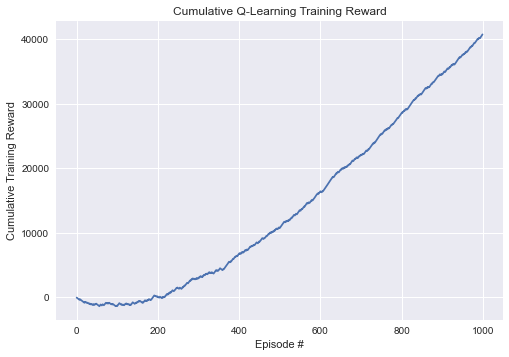

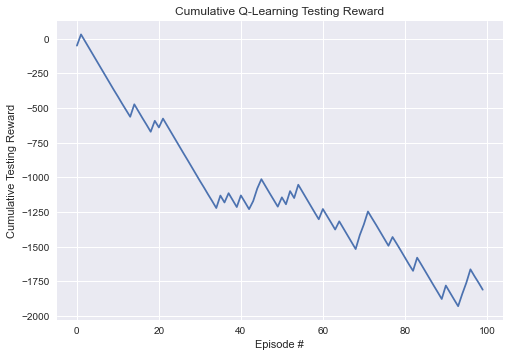

In [9]:
plot_reward_history(qb)

# Test 2
## Columbia Club Website

URL: http://www.columbia.edu/cu/wushu/

![train](./images/train_2.png)
![test](./images/test_2.png)

In [8]:
# Initialize Qubot –– run this once
qb2 = Qubot(
    url_to_test="http://www.columbia.edu/cu/wushu/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_ids=["about"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_ids=["practices"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=20,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

In [16]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.6,
    gamma=0.8,
    epsilon=0.1,
    decay=0.001,
    train_episodes=2000,
    test_episodes=2000,
    step_limit=200,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb2.set_model_config(model_params, reward_func)
qb2.train()

Training on 2000 episodes...
Training done.
Q-learning agent
Steps:                  172540
Alpha:                 0.6000
Gamma:                 0.8000
Original epsilon:      0.1000
Current epsilon:       0.1441
Decay:                 0.0010
Training rewards:      -18734324
Training score:       -9367.1620
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [17]:
qb2.test()

Testing on 2000 episodes...
Testing done.
Q-learning agent
Steps:                  566802
Alpha:                 0.6000
Gamma:                 0.8000
Original epsilon:      0.1000
Current epsilon:       0.1441
Decay:                 0.0010
Training rewards:      -18734324
Training score:       -9367.1620
Testing rewards:       -191093009
Testing score:        -95546.5045
Testing penalties:      193530209
Testing penalty rate:  96765.1045


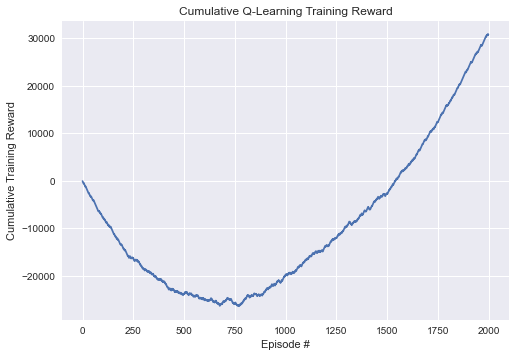

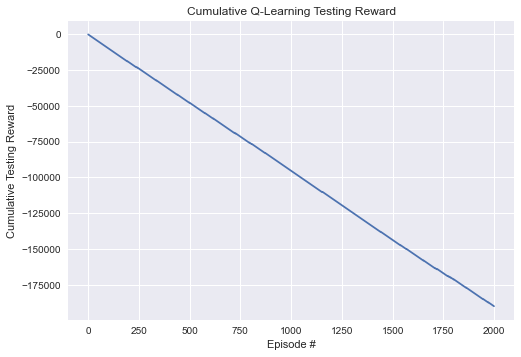

In [18]:
plot_reward_history(qb2)

# Test 3
## Columbia Club Website

URL: https://adicu.com/

![train](./images/train_3.png)
![test](./images/test_3.png)

In [35]:
# Initialize Qubot –– run this once
qb3 = Qubot(
    url_to_test="https://adicu.com/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_contains_text=["Whether you're a total beginner or a grizzled veteran"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_contains_text=["Creative Commons"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={
        "email": "kc3334@columbia.edu",
        "text": "name"
    }
)

In [50]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.9,
    gamma=0.9,
    epsilon=0.1,
    decay=0.01,
    train_episodes=2000,
    test_episodes=2000,
    step_limit=100,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb3.set_model_config(model_params, reward_func)
qb3.train()

Training on 2000 episodes...


Training done.
Q-learning agent
Steps:                  200000
Alpha:                 0.9000
Gamma:                 0.9000
Original epsilon:      0.1000
Current epsilon:       0.0100
Decay:                 0.0100
Training rewards:      -96793143
Training score:       -48396.5715
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [51]:
qb3.test()

Testing on 2000 episodes...
Testing done.
Q-learning agent
Steps:                  400000
Alpha:                 0.9000
Gamma:                 0.9000
Original epsilon:      0.1000
Current epsilon:       0.0100
Decay:                 0.0100
Training rewards:      -96793143
Training score:       -48396.5715
Testing rewards:       -96698876
Testing score:        -48349.4380
Testing penalties:      96698876
Testing penalty rate:  48349.4380


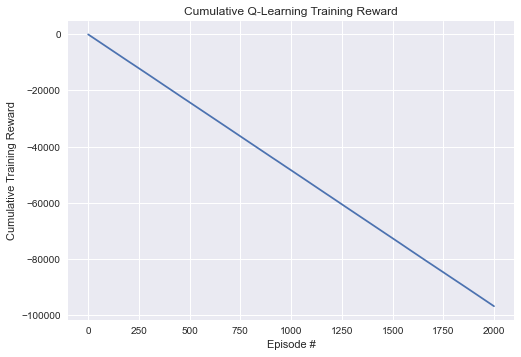

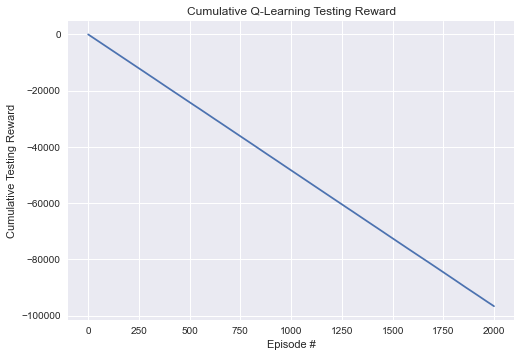

In [52]:
plot_reward_history(qb3)

# Test 4
## Product Landing Page

URL: https://slack.com/

![train](./images/train_4.png)
![test](./images/test_4.png)

In [27]:
# Initialize Qubot –– run this once
qb4 = Qubot(
    url_to_test="https://slack.com/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_ids=["bring-your-team-together-in-channels-video"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_classes=["c-type-headline-primary"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=2,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

Exception ignored in: <function Driver.__del__ at 0x7fd66824a8b0>
Traceback (most recent call last):
  File "/Users/Anthony/opt/anaconda3/lib/python3.8/site-packages/qubot/driver/driver.py", line 181, in __del__
    self.__driver.quit()
AttributeError: 'Driver' object has no attribute '_Driver__driver'


KeyboardInterrupt: 

In [ ]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.6,
    gamma=0.8,
    epsilon=0.1,
    decay=0.001,
    train_episodes=2000,
    test_episodes=2000,
    step_limit=200,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb4.set_model_config(model_params, reward_func)
qb4.train()

In [ ]:
qb4.test()

In [ ]:
plot_reward_history(qb4)

# Test 5
## Museum Website

URL: https://www.guggenheim.org/

![train](./images/train_5.png)
![test](./images/test_5.png)

In [37]:
# Initialize Qubot –– run this once
qb5 = Qubot(
    url_to_test="https://www.guggenheim.org/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_contains_text=["Reserve Tickets"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_contains_text=["Register"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

In [38]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.9,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=100,
    step_limit=1000,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb5.set_model_config(model_params, reward_func)
qb5.train()

Training on 1000 episodes...
Training done.
Q-learning agent
Steps:                  1000000
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.9000
Current epsilon:       0.9059
Decay:                 0.0001
Training rewards:      -249807545
Training score:       -249807.5450
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [39]:
qb5.test()

Testing on 100 episodes...
Testing done.
Q-learning agent
Steps:                  1100000
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.9000
Current epsilon:       0.9059
Decay:                 0.0001
Training rewards:      -249807545
Training score:       -249807.5450
Testing rewards:       -2520917
Testing score:        -25209.1700
Testing penalties:      2520917
Testing penalty rate:  25209.1700


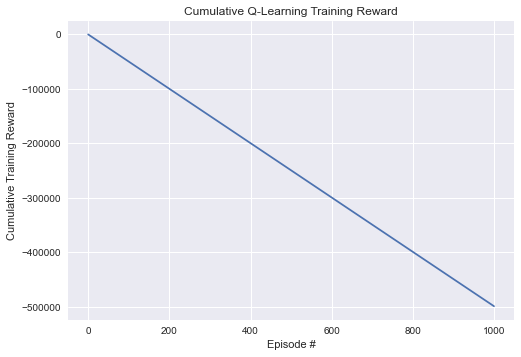

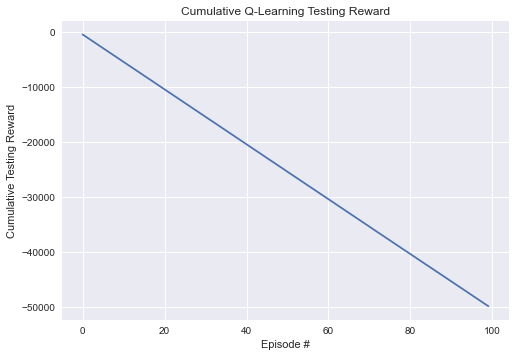

In [40]:
plot_reward_history(qb5)

# Test 6
## Blog

URL: http://blog.ironhead.ninja/2016/09/08/openai-cartpole.html/

![train](./images/train_6.png)
![test](./images/test_6.png)

In [41]:
# Initialize Qubot –– run this once
qb6 = Qubot(
    url_to_test="http://blog.ironhead.ninja/2016/09/08/openai-cartpole.html",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_ids=["setup-the-gym"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_ids=["references"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

In [43]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.1,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=100,
    step_limit=50,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb6.set_model_config(model_params, reward_func)
qb6.train()

Training on 1000 episodes...
Training done.
Q-learning agent
Steps:                  50000
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.1000
Current epsilon:       0.9059
Decay:                 0.0001
Training rewards:      -12512500
Training score:       -12512.5000
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [44]:
qb6.test()

Testing on 100 episodes...
Testing done.
Q-learning agent
Steps:                  55000
Alpha:                 0.8000
Gamma:                 0.8000
Original epsilon:      0.1000
Current epsilon:       0.9059
Decay:                 0.0001
Training rewards:      -12512500
Training score:       -12512.5000
Testing rewards:       -126250
Testing score:        -1262.5000
Testing penalties:      126250
Testing penalty rate:  1262.5000


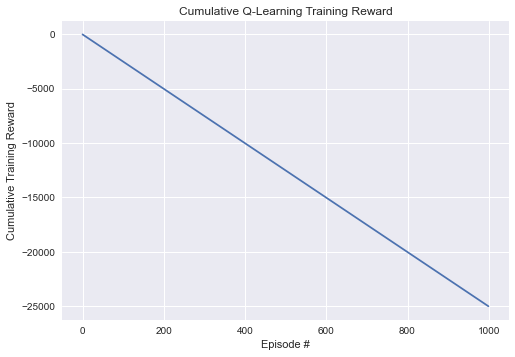

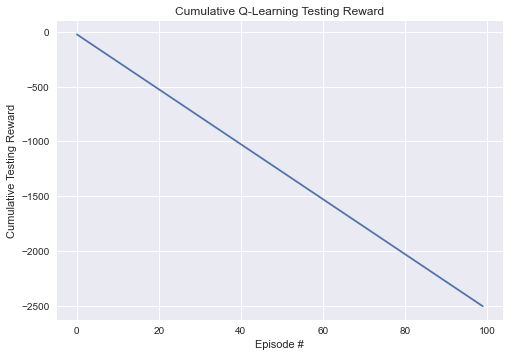

In [45]:
plot_reward_history(qb6)

# Test 7
## Databases Course Website

URL: https://donald-f-ferguson.github.io/W4111S21/index.html

![train](./images/train_7.png)
![test](./images/test_7.png)

In [46]:
# Initialize Qubot –– run this once
qb7 = Qubot(
    url_to_test="https://donald-f-ferguson.github.io/W4111S21/index.html",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_contains_text=["Reference material: Database Systems Concepts (Silberschatz)"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_contains_text=["Set up you connection between DataGrip and you Amazon RDS instance"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    input_values={}
)

In [47]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.9,
    gamma=0.9,
    epsilon=0.9,
    decay=10,
    train_episodes=100,
    test_episodes=10,
    step_limit=1000,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb7.set_model_config(model_params, reward_func)
qb7.train()

Training on 100 episodes...


Training done.
Q-learning agent
Steps:                  100000
Alpha:                 0.9000
Gamma:                 0.9000
Original epsilon:      0.9000
Current epsilon:       0.0100
Decay:                 10.0000
Training rewards:      -2474098
Training score:       -24740.9800
Testing rewards:            0
Testing score:         0.0000
Testing penalties:          0
Testing penalty rate:  0.0000


In [48]:
qb7.test()

Testing on 10 episodes...
Testing done.
Q-learning agent
Steps:                  110000
Alpha:                 0.9000
Gamma:                 0.9000
Original epsilon:      0.9000
Current epsilon:       0.0100
Decay:                 10.0000
Training rewards:      -2474098
Training score:       -24740.9800
Testing rewards:       -26691
Testing score:        -2669.1000
Testing penalties:      27241
Testing penalty rate:  2724.1000


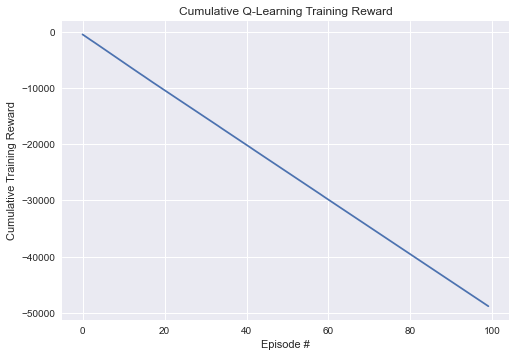

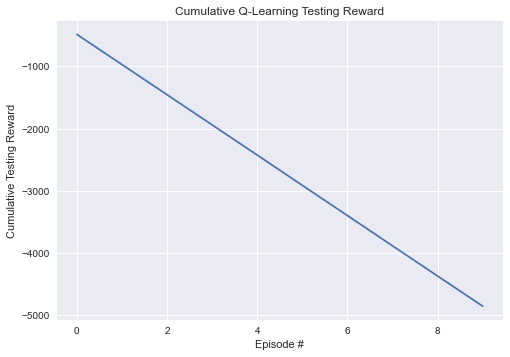

In [49]:
plot_reward_history(qb7)

# Test 8
## Columbia Entrepreneurship Website

URL: https://entrepreneurship.engineering.columbia.edu/

![train](./images/train_8.png)
![test](./images/test_8.png)

In [50]:
# Initialize Qubot –– run this once
qb8 = Qubot(
    url_to_test="https://entrepreneurship.engineering.columbia.edu/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_contains_text=["Yazmin Feliz, Ultrasonos, Summer 2020 Bootcamp"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_contains_text=["COI Policies and Resources"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=2,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

KeyboardInterrupt: 

In [ ]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.9,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=100,
    step_limit=1000,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb8.set_model_config(model_params, reward_func)
qb8.train()

In [ ]:
qb8.test()

In [ ]:
plot_reward_history(qb8)

# Test 9
## Website predicting climate change

URL: https://www.howhotwillitget.com/

![train](./images/train_9.png)
![test](./images/test_9.png)

In [51]:
# Initialize Qubot –– run this once
qb9 = Qubot(
    url_to_test="https://www.howhotwillitget.com/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_contains_text=["Afghanistan is a landlocked country located in South and Central Asia."],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_contains_text=["Uganda, located in East Africa, is a landlocked country"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={
        "search": "Uganda"
    }
)

KeyboardInterrupt: 

In [ ]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.9,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=100,
    step_limit=1000,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb9.set_model_config(model_params, reward_func)
qb9.train()

In [ ]:
qb9.test()

In [ ]:
plot_reward_history(qb9)

# Test 10
## Yann LeCun's website

URL: http://yann.lecun.com/

![train](./images/train_10.png)
![test](./images/test_10.png)

In [30]:
# Initialize Qubot –– run this once
qb10 = Qubot(
    url_to_test="http://yann.lecun.com/",
    terminal_info_testing=QubotConfigTerminalInfo(
        terminal_contains_text=["Biographies:"],
    ),
    terminal_info_training=QubotConfigTerminalInfo(
        terminal_contains_text=["IF YOU REALLY NEED ME TO DO SOMETHING FOR YOU"],
    ),
    driver_params=QubotDriverParameters(
        use_cache=False,
        max_urls=10,
    ),
    model_params=None,
    reward_func=QubotPresetRewardFunc.ENCOURAGE_SUCCESS,
    input_values={}
)

KeyboardInterrupt: 

In [ ]:
# Configure model parameters through trial and error
model_params = QubotConfigModelParameters(
    alpha=0.8,
    gamma=0.8,
    epsilon=0.9,
    decay=0.0001,
    train_episodes=1000,
    test_episodes=1000,
    step_limit=200,
)
reward_func = QubotPresetRewardFunc.ENCOURAGE_SUCCESS
qb10.set_model_config(model_params, reward_func)
qb10.train()

In [ ]:
qb10.test()

In [ ]:
plot_reward_history(qb10)